In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *
import math
import csv
import pandas as pd
from scipy.optimize import minimize

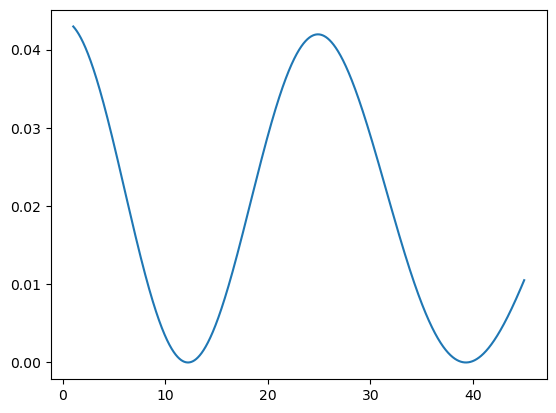

In [2]:
def I(theta):
    # Plot thoeritical
    I_0 = 0.0437/4
    a = 7.5e-3 # slit spacing
    d =  a + 59.97 * 10**(-3)
    lamb_da = 2.85e-2 #Wrong LOL

    alph = (math.pi * a * np.sin(theta))/ lamb_da
    bet =  (math.pi * d * np.sin(theta)) / lamb_da
    return 4 * I_0 * (np.sin(alph)**2/alph**2) * np.cos(bet) ** 2
theta_theory = np.arange(1,45.01,0.01)
plt.plot(theta_theory,I(np.deg2rad(theta_theory)))
    

0.023295185283546026


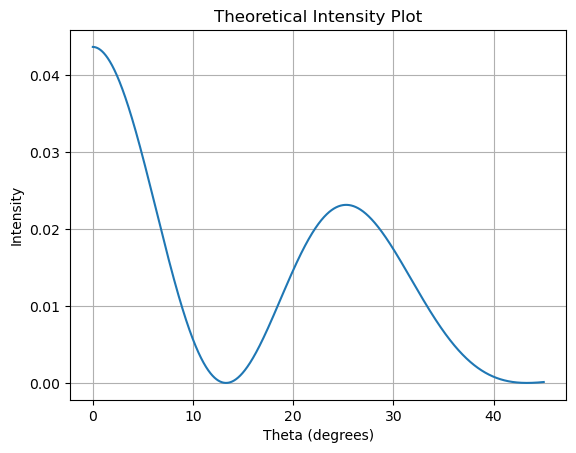

In [3]:
def LOVE_PHYSIC(theta, a, max_value):
    # Plot theoretical
    # I_0 = max_value  # Change till it works 

    # All units in meters
    # a = 0.05e-3
    # d = 0.1e-3 
    # R = 1
    # wavelength = 500e-9  # Wavelength
    # H = R * np.tan(theta)

    # a = abc
    d = 59.97e-3
    R = (116.69 + 106.72)*10**-3
    wavelength = 2.85e-2
    H = R * np.tan(theta)

    x_2 = np.sqrt((H + (a/2 + d/2))**2 + R**2)
    x_1 = np.sqrt((H - (a/2 + d/2))**2 + R**2)
    I_P = (np.cos((np.pi / (wavelength)) * (x_2 - x_1)))**2

    I_SP = np.zeros_like(theta)
    I_SN = np.zeros_like(theta)

    N = 10000
    for b in range(N):
        h1 = R * np.tan(theta) - (d / 2 + a * b / N)
        h2 = R * np.tan(theta) - (d / 2 + a * (b + 1) / N)
        h3 = R * np.tan(theta) + (d / 2 + a * b / N)
        h4 = R * np.tan(theta) + (d / 2 + a * (b + 1) / N)

        dist1 = np.sqrt(R**2 + h1**2)
        dist2 = np.sqrt(R**2 + h2**2)
        dist3 = np.sqrt(R**2 + h3**2)
        dist4 = np.sqrt(R**2 + h4**2)

        term1 = 2 * np.pi / wavelength * (dist2 - dist1)
        term2 = 2 * np.pi / wavelength * (dist4 - dist3)

        I_SP += np.sin(term1)
        I_SN += np.sin(term2)

    return  I_P * (I_SP + I_SN)**2 
    # 

I_max = 0.0437

# Generate theta values (small angle approximation)
theta_theory = np.linspace(np.deg2rad(0.01) , np.deg2rad(45), 10000)  # Reasonable range in radians

# Calculate intensity values
intensity_values = LOVE_PHYSIC(theta_theory, 2.5e-3, I_max)
print(intensity_values[1])
# Plotting
plt.plot(np.rad2deg(theta_theory), I_max * intensity_values/intensity_values[1])
plt.xlabel('Theta (degrees)')
plt.ylabel('Intensity')
plt.title('Theoretical Intensity Plot')
plt.grid(True)
plt.show()


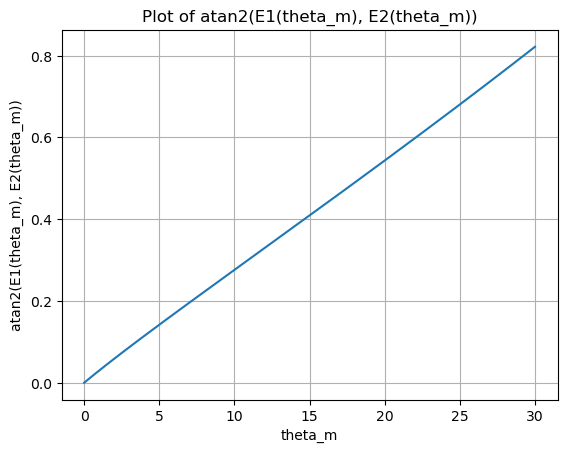

In [4]:
def S(theta_m):
    return np.sqrt(-7.339912619e13 * theta_m**4 - 2.775474987e15 * theta_m**3 + 4.401840427e17 * theta_m**2 + 8.818507867e18 * theta_m + 2.815853157e19)

def E1(theta_m):
    return 0.000059109049 * theta_m**2 + 0.00111755886 * theta_m - 0.187806994 + 3.539145159e-11 * S(theta_m)

def E2(theta_m):
    return -0.0003032102096 * theta_m**2 - 0.005732713700 * theta_m + 0.9633888366 + 6.899355576e-12 * S(theta_m)

# Compute atan2 values
def theta_conversion(theta_m):
    return np.arctan2(E1(theta_m), E2(theta_m))

# Generate theta_m values
theta_m_values = np.linspace(0, 30, 1000)

# Plot the results
plt.plot(theta_m_values, theta_conversion(theta_m_values))
plt.xlabel('theta_m')
plt.ylabel('atan2(E1(theta_m), E2(theta_m))')
plt.title('Plot of atan2(E1(theta_m), E2(theta_m))')
plt.grid(True)
plt.show()


C:\Users\ryanm\AppData\Local\Temp\ipykernel_27732\2876223334.py:43: RuntimeWarning: invalid value encountered in divide
  theoretical_intens = I_max * experimental_plot(theta, a, d, R) / experimental_plot(theta, a, d, R)[0]


Optimal a: 4.1316704415283304e-08
Optimal d: 0.0
Optimal R: 0.599977363584343


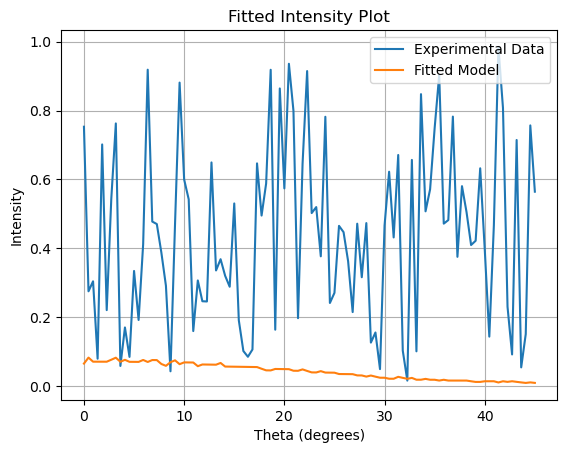

In [5]:
# Experimental data (example, replace with actual data)
experimental_theta = np.linspace(np.deg2rad(0.01), np.deg2rad(45), 100)
experimental_intensity = np.random.rand(100)  # Replace with actual intensity data
I_max = 0.0653

# Define the theoretical model function
def experimental_plot(theta, a, d, R):
    wavelength = 2.85e-2
    wavelength_scale = np.sqrt(R**2 + (R * np.tan(theta) - (d / 2 + a / 2))**2) / np.sqrt(R**2 * np.cos(theta)**2 + (R * np.sin(theta) - (d / 2 + a / 2))**2)
    wavelength_scale_bottom = np.sqrt(R**2 + (R * np.tan(theta) + (d / 2 + a / 2))**2) / np.sqrt(R**2 * np.cos(theta)**2 + (R * np.sin(theta) + (d / 2 + a / 2))**2)
    H = R * np.tan(theta)

    x_2 = np.sqrt((H + (a / 2 + d / 2))**2 + R**2)
    x_1 = np.sqrt((H - (a / 2 + d / 2))**2 + R**2)
    I_P = (np.cos((np.pi / (wavelength * wavelength_scale)) * (x_2 - x_1)))**2

    I_SP = np.zeros_like(theta)
    I_SN = np.zeros_like(theta)
    N = 1000

    for b in range(N):
        h1 = R * np.tan(theta) - (d / 2 + a * b / N)
        h2 = R * np.tan(theta) - (d / 2 + a * (b + 1) / N)
        h3 = R * np.tan(theta) + (d / 2 + a * b / N)
        h4 = R * np.tan(theta) + (d / 2 + a * (b + 1) / N)

        dist1 = np.sqrt(R**2 + h1**2)
        dist2 = np.sqrt(R**2 + h2**2)
        dist3 = np.sqrt(R**2 + h3**2)
        dist4 = np.sqrt(R**2 + h4**2)

        term1 = 2 * np.pi / (wavelength * wavelength_scale) * (dist2 - dist1)
        term2 = 2 * np.pi / (wavelength * wavelength_scale_bottom) * (dist4 - dist3)

        I_SP += np.sin(term1)
        I_SN += np.sin(term2)

    return I_P * ((I_SP + I_SN))**2

# Define the cost function to minimize
def cost_function(params, theta, experimental_intensity, I_max):
    a, d, R = params
    theoretical_intens = I_max * experimental_plot(theta, a, d, R) / experimental_plot(theta, a, d, R)[0]
    return np.sum((theoretical_intens - experimental_intensity)**2)

# Initial guess for the parameters
initial_guess = [0.05e-3, 0.1e-3, 570e-3]
bounds = [(0, None), (0, None), (500e-3, 600e-3)] 

# Perform the optimization
def optimize(initial_guess, experimental_theta, experimental_intensity, I_max, bounds):
    result = minimize(cost_function, initial_guess, args=(experimental_theta, experimental_intensity, I_max), method='Nelder-Mead', bounds=bounds)
    optimal_a, optimal_d, optimal_R = result.x
    return optimal_a, optimal_d, optimal_R

optimal_a, optimal_d, optimal_R = optimize(initial_guess, experimental_theta, experimental_intensity, I_max, bounds)

print(f'Optimal a: {optimal_a}')
print(f'Optimal d: {optimal_d}')
print(f'Optimal R: {optimal_R}')

# Plot the results
optimal_intensity = I_max * experimental_plot(experimental_theta, optimal_a, optimal_d, optimal_R) / experimental_plot(experimental_theta, optimal_a, optimal_d, optimal_R)[0]
plt.plot(np.rad2deg(experimental_theta), experimental_intensity, label='Experimental Data')
plt.plot(np.rad2deg(experimental_theta), optimal_intensity, label='Fitted Model')
plt.xlabel('Theta (degrees)')
plt.ylabel('Intensity')
plt.title('Fitted Intensity Plot')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
def graph(spacing, trial):
    # Arrays that I need
    angle = []
    current = []
    
    #Constants
    r = 29.27 /2
    R = 570

    # Values I need to keep track of for data correction
    theta = 0
    cur_max_angle = 0
    cur_max_value = 0
    cur_min_value = 0
    current_max_index = 0
    current_max_angle_index = 0
    second_peak_max = 0

    # Construct filename for the current trial
    filename = f"Week_9_data/d_{spacing}_T_{trial}.CSV"

    # Adding to each array  
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        next(reader) # skip the header        

        for row in reader:
            
            # theta = r/R * float(row[2])
            theta = theta_conversion(float(row[2]))
            if (cur_max_angle < theta):
                angle.append(abs(theta*(360/6.14)))
                current.append(float(row[1]))
                cur_max_angle = theta

            if (cur_max_value < float(row[1])):
                cur_max_value = float(row[1])
                cur_max_value_angle = float(row[2]) # Should apply conversions to this speratately
                current_max_index = len(current)
                current_max_angle_index = len(angle)
            elif (cur_min_value > float(row[1])):
                cur_min_value = float(row[1])

            if (np.deg2rad(45-20) > theta and second_peak_max < float(row[1])):
                second_peak_max = float(row[1])
            
    # Apply all of the conversions

    current = current[:current_max_index + 3]
    angle = angle[:current_max_angle_index + 3]
    current = [x - cur_min_value for x in current] # An attempt to mitigate the noise from other expiriments
    current = current[::-1] # Reverse the array
    cur_max_value -= cur_min_value
    second_peak_max -= cur_min_value
    # angle = angle[::-1]

    # print("angle:", angle)
    # print("current:", current)
    print("Max value: ", cur_max_value)
    print("Second peak: ", second_peak_max)
    # print("Theta_m of max value: ", cur_max_value_angle)
    print("Min value: ", cur_min_value)


    # # Calculate R²
    # r_squared = calculate_r_squared(merge_current, optimal_intensity)
    # print("R²:", r_squared)

    # Theory line plotting
    theta_theory = np.linspace(np.deg2rad(0.01) , np.deg2rad(45), 10000)
    intensity_values_graph = LOVE_PHYSIC(theta_theory, spacing*10**-3, 0.0437)
    
    # plt.plot(theta_theory,I(np.deg2rad(theta_theory)))

    # Experimnetal optimzaition 
    initial_guess = [spacing*10**-3, 59.97e-3, (116.69 + 106.72)*10**-3] 
    bounds = [(spacing*10**-4, spacing*10**-2), (59.97e-4, 59.97e-2), 
              ((116.69 + 106.72)*10**-4, (116.69 + 106.72)*10**-2)] 
    optimal_a, optimal_d, optimal_R = optimize(initial_guess, np.deg2rad(angle), current, cur_max_value, bounds)
    print(optimal_a, optimal_d, optimal_R)
    optimal_intensity = cur_max_value * experimental_plot(np.deg2rad(angle), optimal_a, optimal_d, optimal_R) / experimental_plot(np.deg2rad(angle), optimal_a, optimal_d, optimal_R)[0]
    

    plt.figure(figsize=(10, 5))
    plt.plot(angle, current, marker='o')

    plt.plot(np.rad2deg(theta_theory), intensity_values/intensity_values[1] * cur_max_value)
    plt.plot(angle, optimal_intensity, label='Fitted Model')

    # Labeling the axes
    plt.xlabel('angle')
    plt.ylabel('current')
    plt.title(f"Week_9_data/d_{spacing}_T_{trial}.CSV")

    # Printing the graph
    plt.grid(True)
    plt.show()

    return optimal_a, optimal_d, optimal_R, cur_max_value, second_peak_max

# Test value if I need
# spacing = 5
# trial = 1
# graph(spacing, trial)
# trial = 2
# graph(spacing, trial)
# trial = 3
# graph(spacing, trial)
# trial = 4
# graph(spacing, trial)
# trial = 5
# graph(spacing, trial)


In [450]:
def export_data(export_data_OA, export_data_OD, export_data_OR, export_data_FM, export_data_SM, spacing):
    data = {
        'Trials': [],
        'a': [],
        'd': [],
        'R': [],
        'First peak': [],
        'Second peak': [],
    }

    trial_labels = ["Trial 1", "Trial 2", "Trial 3", "Trial 4", "Trial 5"]
    for i in range(5):
        data['Trials'].append(trial_labels[i])
        data['a'].append(export_data_OA[i])
        data['d'].append(export_data_OD[i])
        data['R'].append(export_data_OR[i])
        data['First peak'].append(export_data_FM[i])
        data['Second peak'].append(export_data_SM[i])

    df = pd.DataFrame(data)

    filename = 'refined_data.xlsx'

    with pd.ExcelWriter(filename, engine='openpyxl', mode='a' if spacing > 1 else 'w') as writer:
        df.to_excel(writer, index=False, sheet_name=f"Spacing of {spacing}")

    print(f"Data has been written to {filename}")


In [ ]:
# def(spacing, trial)
# return optimal_a, optimal_d, optimal_R, cur_max_value, second_peak_max

spacing = [2.5, 5, 7.5, 10, 12.5]
total_trials = [1, 2, 3, 4, 5]

for test_spacing in spacing:
    # Initialize lists to collect data for each height
    export_data_OA = []
    export_data_OD = []
    export_data_OR = []
    export_data_FM = []
    export_data_SM = []

    
    for test_trials in total_trials:
        OA, OD, OR, FM, SM = graph(test_spacing, test_trials)
        export_data_OA.append(OA)
        export_data_OD.append(OD)
        export_data_OR.append(OR)
        export_data_FM.append(FM)
        export_data_SM.append(SM)

        
        # Export data after collecting all trials for the current height
    export_data(export_data_OA, export_data_OD, export_data_OR, export_data_FM, export_data_SM, test_spacing)

    # Reset data arrays for the next height
    export_data_OA = []
    export_data_OD = []
    export_data_OR = []
    export_data_FM = []
    export_data_SM = []


In [8]:
def calculate_r_squared(observed, predicted):
    # Calculate the mean of the observed data
    mean_observed = np.mean(observed)

    # Calculate the total sum of squares (SS_tot)
    ss_tot = np.sum((observed - mean_observed) ** 2)

    # Calculate the residual sum of squares (SS_res)
    ss_res = np.sum((observed - predicted) ** 2)

    # Calculate R²
    r_squared = 1 - (ss_res / ss_tot)
    
    return r_squared


In [ ]:
spacing = 2.5
trial = 1
graph(spacing, trial)
trial = 2
graph(spacing, trial)
trial = 3
graph(spacing, trial)
trial = 4
graph(spacing, trial)
trial = 5
graph(spacing, trial)

spacing = 5
trial = 1
graph(spacing, trial)
trial = 2
graph(spacing, trial)
trial = 3
graph(spacing, trial)
trial = 4
graph(spacing, trial)
trial = 5
graph(spacing, trial)

spacing = 7.5
trial = 1
graph(spacing, trial)
trial = 2
graph(spacing, trial)
trial = 3
graph(spacing, trial)
trial = 4
graph(spacing, trial)
trial = 5
graph(spacing, trial)

spacing = 10
trial = 1
graph(spacing, trial)
trial = 2
graph(spacing, trial)
trial = 3
graph(spacing, trial)
trial = 4
graph(spacing, trial)
trial = 5
graph(spacing, trial)

spacing = 12.5
trial = 1
graph(spacing, trial)
trial = 2
graph(spacing, trial)
trial = 3
graph(spacing, trial)
trial = 4
graph(spacing, trial)
trial = 5
graph(spacing, trial)

0.0007796999196702332 0.07119400070714721 2.2341
R²: 0.8869954447782493


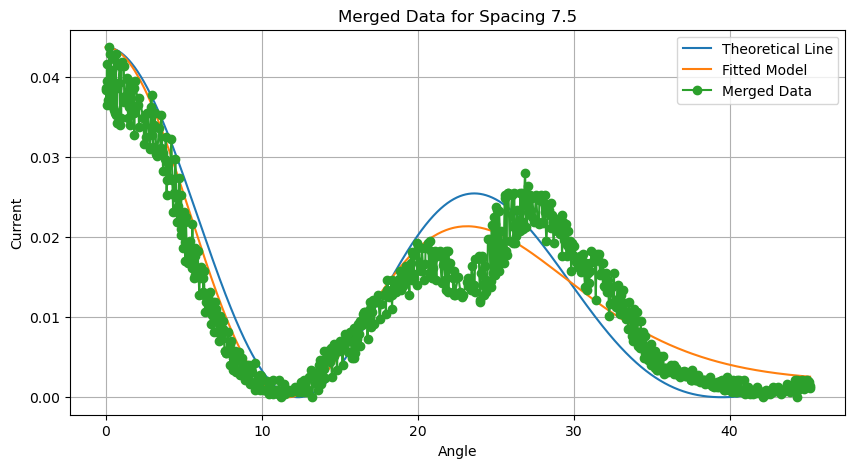

0

In [97]:
def merge(spacing):
    # Initialize everything
    merge_angle = []
    merge_current = []

    # Values I need to keep track of for data correction
    cur_max_value = float('-inf')
    cur_min_value = float('inf')

    for x in range(5):
        # Construct filename for the current trial
        filename = f"Week_9_data/d_{spacing}_T_{x + 1}.CSV"
        cur_max_angle = 0

        # Adding to each array  
        with open(filename, 'r') as file:
            reader = csv.reader(file)
            next(reader)  # skip the header

            for row in reader:
                theta = theta_conversion(float(row[2]))
                cur_current = float(row[1])

                if cur_max_angle < theta:
                    cur_max_angle = theta

                # Check if angle is in merge_angle
                if theta in merge_angle:
                    index = merge_angle.index(theta)
                    merge_current[index] = (merge_current[index] + cur_current) / 2
                else:
                    # Find the correct position to insert the new angle
                    index = next((i for i, val in enumerate(merge_angle) if val > theta), len(merge_angle))
                    merge_angle.insert(index, theta)
                    merge_current.insert(index, cur_current)

                # Update max and min current values
                cur_max_value = max(cur_max_value, cur_current)
                cur_min_value = min(cur_min_value, cur_current)

    cut_off = 760
    merge_angle = merge_angle[:cut_off]
    merge_current = merge_current[:cut_off]

    merge_current = [x - cur_min_value for x in merge_current]
    merge_current = merge_current[::-1]
    merge_angle = np.rad2deg(merge_angle)

    theta_theory = np.linspace(np.deg2rad(0.01), np.deg2rad(45), 10000)
    intensity_values_graph = LOVE_PHYSIC(theta_theory, spacing * 10**-3, 0.0437)

    initial_guess = [spacing * 10**-3, 59.97e-3, (116.69 + 106.72) * 10**-3]
    bounds = [(spacing * 10**-4, spacing * 10**-2), (59.97e-4, 59.97e-2), ((116.69 + 106.72) * 10**-4, (116.69 + 106.72) * 10**-2)]
    optimal_a, optimal_d, optimal_R = optimize(initial_guess, np.deg2rad(merge_angle), merge_current, cur_max_value, bounds)
    print(optimal_a, optimal_d, optimal_R)

    optimal_intensity = cur_max_value * experimental_plot(np.deg2rad(merge_angle), optimal_a, optimal_d, optimal_R) / experimental_plot(np.deg2rad(merge_angle), optimal_a, optimal_d, optimal_R)[0]

    # Calculate R²
    r_squared = calculate_r_squared(merge_current, optimal_intensity)
    print("R²:", r_squared)

    plt.figure(figsize=(10, 5))
    plt.plot(np.rad2deg(theta_theory), intensity_values_graph / intensity_values_graph[1] * cur_max_value, label='Theoretical Line')
    plt.plot(merge_angle, optimal_intensity, label='Fitted Model')
    plt.plot(merge_angle, merge_current, marker='o', label='Merged Data')

    plt.xlabel('Angle')
    plt.ylabel('Current')
    plt.title(f"Merged Data for Spacing {spacing}")
    plt.grid(True)
    plt.legend()
    plt.show()

    return 0

# Test value if needed
spacing = 7.5
merge(spacing)

